In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl


In [152]:
#carga desde un archivo .xlsx sin indice
import pandas as pd
Micro_retailer = pd.read_csv('spain_menorca_procesado_outliers (2).csv')

In [153]:
#eliminamos primera columna innecesaria  
Micro_retailer= Micro_retailer.drop(['Unnamed: 0'], axis=1)

In [154]:
Micro_retailer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3945 entries, 0 to 3944
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  3945 non-null   object 
 1   host_name                                     3945 non-null   object 
 2   host_since                                    3945 non-null   object 
 3   host_location                                 3945 non-null   object 
 4   host_response_time                            3945 non-null   object 
 5   host_response_rate                            3945 non-null   object 
 6   host_acceptance_rate                          3945 non-null   object 
 7   host_is_superhost                             3945 non-null   object 
 8   host_has_profile_pic                          3945 non-null   object 
 9   host_identity_verified                        3945 non-null   o

In [155]:
Micro_retailer.head()

,last_scraped,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2024-09-30,Manuela,2010-08-06,"Sant Lluís, Spain",within an hour,100%,100%,t,t,t,...,0.0,4.65,4.76,4.62,4.75,4.75,3.0,0.0,0.0,0.14
1,2024-09-30,Yolanda,2011-04-26,"Barcelona, Spain",within a few hours,100%,94%,f,t,t,...,2.0,4.69,4.77,4.68,4.75,4.77,1.0,0.0,0.0,0.40
2,2024-09-30,Natalia,2010-12-07,"Madrid, Spain",a few days or more,20%,0%,f,t,t,...,0.0,4.55,4.45,4.27,4.50,4.50,3.0,0.0,0.0,0.10
3,2024-09-30,Natalia,2010-12-07,"Madrid, Spain",a few days or more,20%,0%,f,t,t,...,0.0,4.83,4.79,4.54,4.65,4.70,3.0,0.0,0.0,0.16
4,2024-09-30,Emilio,2012-02-12,"Torrent, Spain",within an hour,100%,83%,t,t,t,...,2.0,4.99,4.96,4.99,4.95,4.94,1.0,0.0,0.0,0.53


In [157]:
freq_tbl(Micro_retailer)

  last_scraped  frequency  percentage  cumulative_perc
0   2024-09-30       3567    0.904183         0.904183
1   2024-09-29        378    0.095817         1.000000

----------------------------------------------------------------

      host_name  frequency  percentage  cumulative_perc
0        Holidu        245    0.062104         0.062104
1    Villa Plus        214    0.054246         0.116350
2        Solmar        125    0.031686         0.148035
3       3Villas        111    0.028137         0.176172
4    World2Meet         59    0.014956         0.191128
..          ...        ...         ...              ...
920       Emily          1    0.000253         0.998986
921    Norberto          1    0.000253         0.999240
922         Pol          1    0.000253         0.999493
923       Klaus          1    0.000253         0.999747
924      Damian          1    0.000253         1.000000

[925 rows x 4 columns]

----------------------------------------------------------------

     

In [158]:
table1=freq_tbl(Micro_retailer['host_response_time'])
table1

,host_response_time,frequency,percentage,cumulative_perc
0,within an hour,3183,0.806844,0.806844
1,within a few hours,477,0.120913,0.927757
2,within a day,222,0.056274,0.984030
3,a few days or more,63,0.015970,1.000000


In [159]:
table2=table1.drop(['percentage','cumulative_perc'], axis=1)

In [160]:
filtro=table2[table2['frequency']>1]
filtro

,host_response_time,frequency
0,within an hour,3183
1,within a few hours,477
2,within a day,222
3,a few days or more,63


In [161]:
filtro_index=filtro.set_index('host_response_time')
filtro_index

,frequency
host_response_time,
within an hour,3183
within a few hours,477
within a day,222
a few days or more,63


Text(0, 0.5, 'frecuhencia')

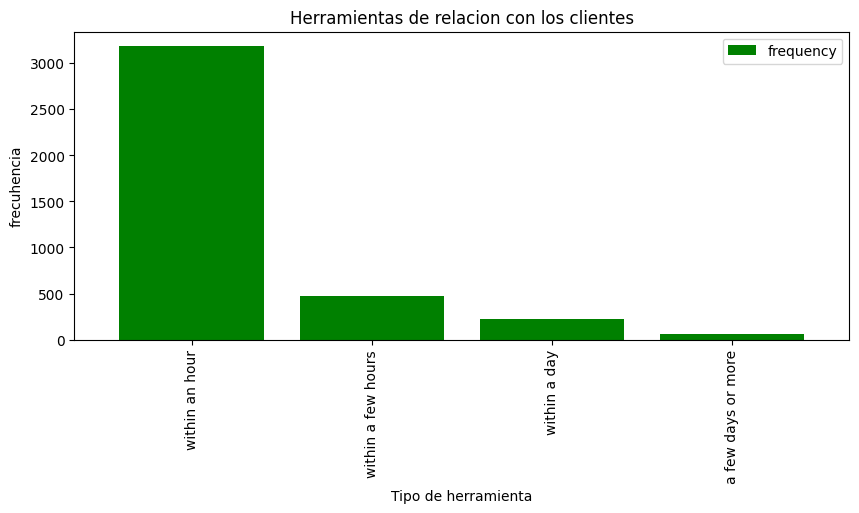

In [162]:
filtro_index.plot(kind='bar', width=0.8, figsize=(10,4), color='green')
plt.title('Herramientas de relacion con los clientes')
plt.xlabel('Tipo de herramienta')
plt.ylabel('frecuhencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

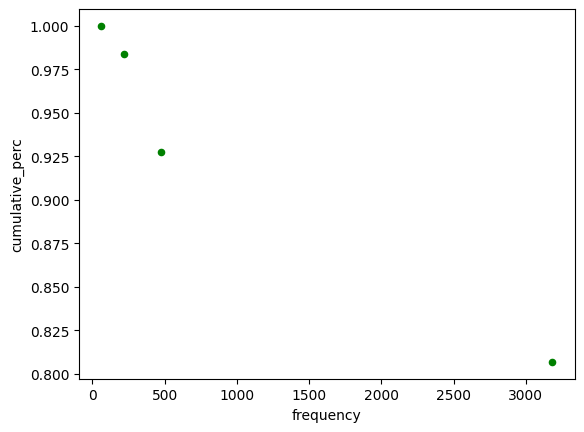

In [163]:
table1.plot("frequency", "cumulative_perc", kind="scatter", color='green')

<Axes: xlabel='host_response_time'>

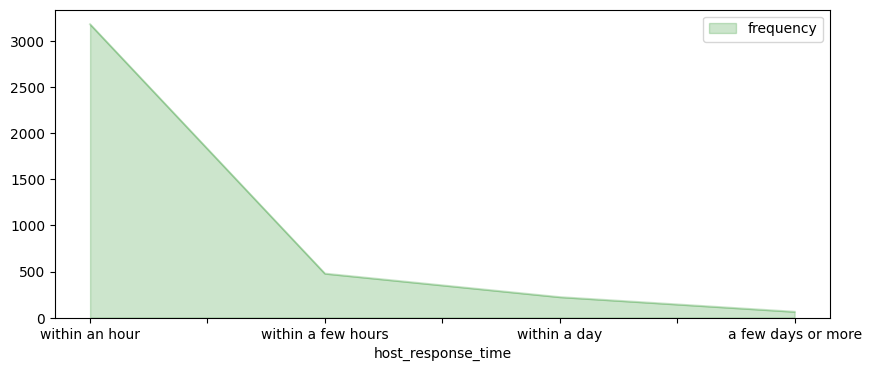

In [164]:
filtro_index.plot(kind='area', figsize=(10,4), alpha=0.2,color='green' )

<Axes: ylabel='frequency'>

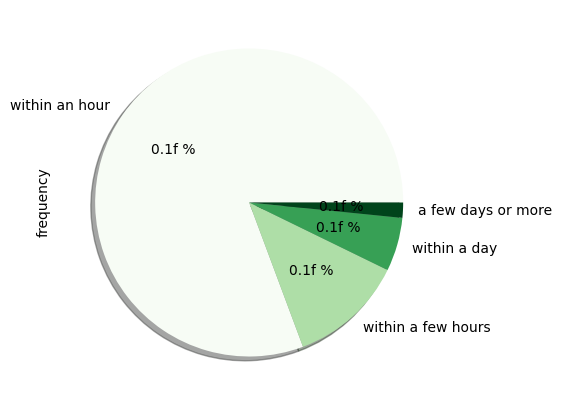

In [165]:
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="0.1f %%", colormap="Greens")

host_response_rate

In [241]:
table3=freq_tbl(Micro_retailer['host_response_rate'])
table3

,host_response_rate,frequency,percentage,cumulative_perc
0,Totalmente Satisfecho,3550,0.899873,0.907928
1,Muy Contento,175,0.044360,0.952685
2,Bastante Satisfecho,69,0.017490,0.970332
3,Muy Satisfecho,49,0.012421,0.982864
4,Neutral,30,0.007605,0.990537
5,Satisfecho,10,0.002535,0.993095
6,Poco Insatisfecho,8,0.002028,0.995141
7,Medianamente Insatisfecho,8,0.002028,0.997187
8,Muy Insatisfecho,6,0.001521,0.998721
9,Insatisfecho,5,0.001267,1.000000


In [242]:
table4=table3.drop(['percentage','cumulative_perc'], axis=1)

In [243]:
filtro1=table4[table4['frequency']>1]
filtro1

,host_response_rate,frequency
0,Totalmente Satisfecho,3550
1,Muy Contento,175
2,Bastante Satisfecho,69
3,Muy Satisfecho,49
4,Neutral,30
5,Satisfecho,10
6,Poco Insatisfecho,8
7,Medianamente Insatisfecho,8
8,Muy Insatisfecho,6
9,Insatisfecho,5


In [244]:
filtro1_index=filtro.set_index('host_response_time')
filtro1_index

,frequency
host_response_time,
within an hour,3183
within a few hours,477
within a day,222
a few days or more,63


Text(0, 0.5, 'frecuhencia')

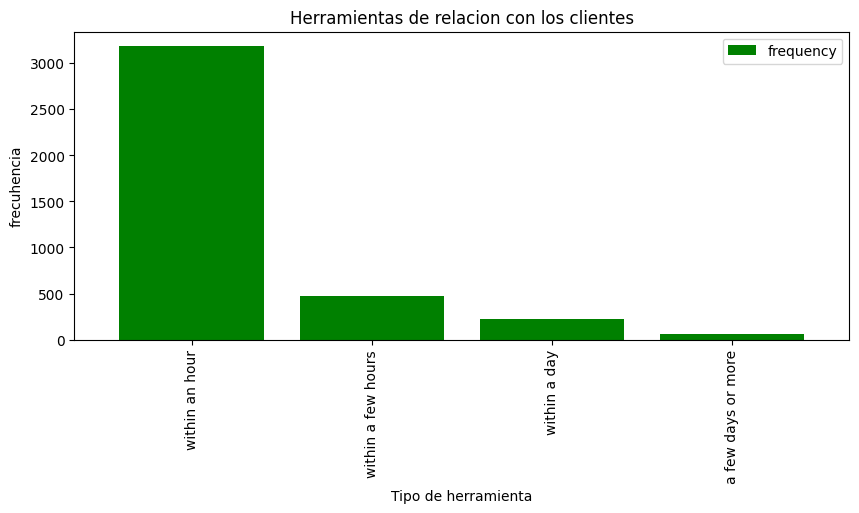

In [245]:
filtro1_index.plot(kind='bar', width=0.8, figsize=(10,4), color='green')
plt.title('Herramientas de relacion con los clientes')
plt.xlabel('Tipo de herramienta')
plt.ylabel('frecuhencia')

<Axes: xlabel='host_response_time'>

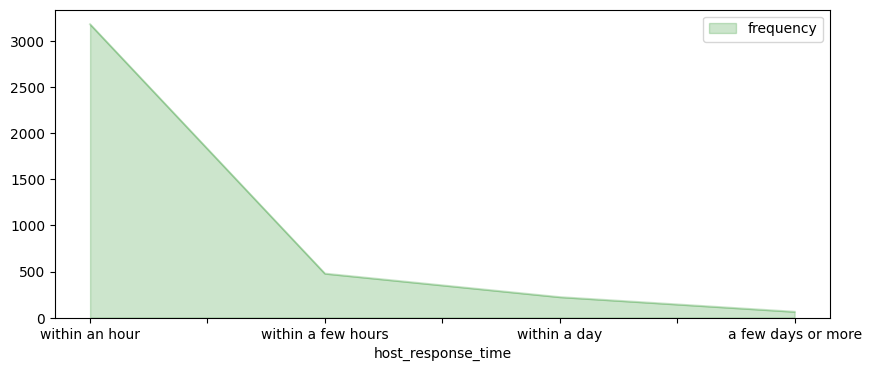

In [246]:
filtro1_index.plot(kind='area', figsize=(10,4), alpha=0.2,color='green' )

<Axes: ylabel='frequency'>

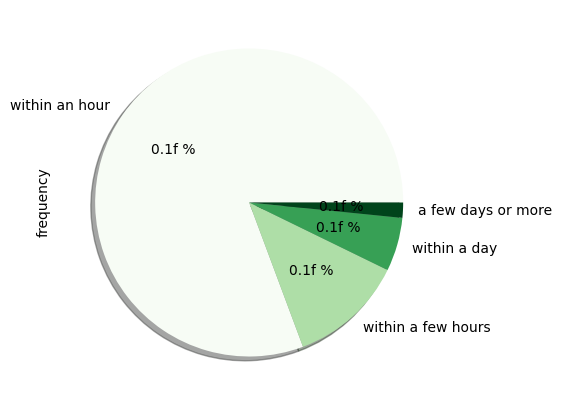

In [247]:
filtro1_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="0.1f %%", colormap="Greens")

host_acceptance_rate

In [248]:
table1=freq_tbl(Micro_retailer['host_acceptance_rate'])
table2=table1.drop(['percentage','cumulative_perc'], axis=1)
filtro=table2[table2['frequency']>1]
filtro_index=filtro.set_index('host_acceptance_rate')




Text(0, 0.5, 'frecuhencia')

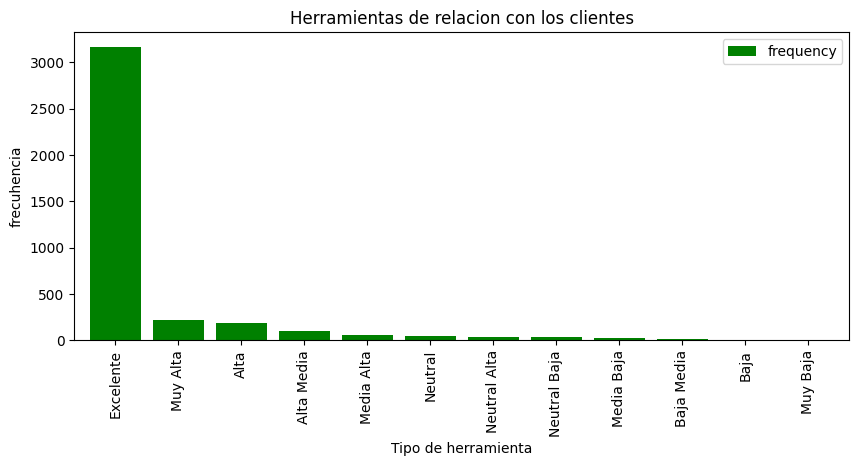

In [249]:
filtro_index.plot(kind='bar', width=0.8, figsize=(10,4), color='green')
plt.title('Herramientas de relacion con los clientes')
plt.xlabel('Tipo de herramienta')
plt.ylabel('frecuhencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

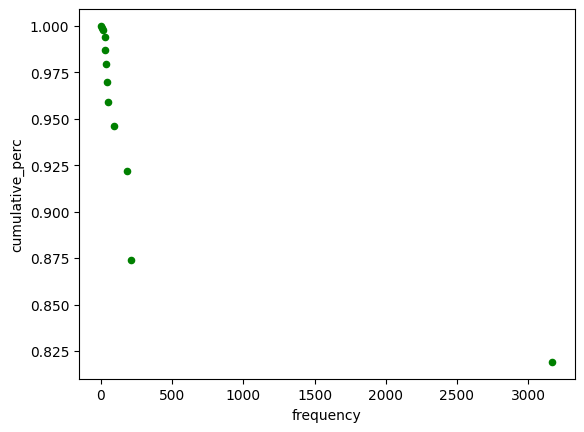

In [250]:
table1.plot("frequency", "cumulative_perc", kind="scatter", color='green')

<Axes: ylabel='frequency'>

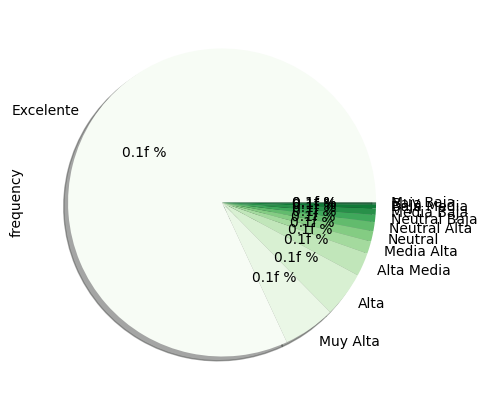

In [251]:
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="0.1f %%", colormap="Greens")

host_is_superhost

In [252]:
table1=freq_tbl(Micro_retailer['host_is_superhost'])
table2=table1.drop(['percentage','cumulative_perc'], axis=1)
filtro=table2[table2['frequency']>1]
filtro_index=filtro.set_index('host_is_superhost')

Text(0, 0.5, 'frecuhencia')

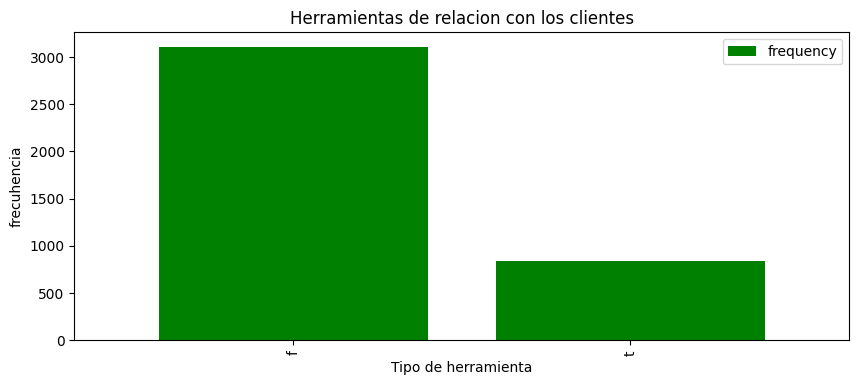

In [253]:
filtro_index.plot(kind='bar', width=0.8, figsize=(10,4), color='green')
plt.title('Herramientas de relacion con los clientes')
plt.xlabel('Tipo de herramienta')
plt.ylabel('frecuhencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

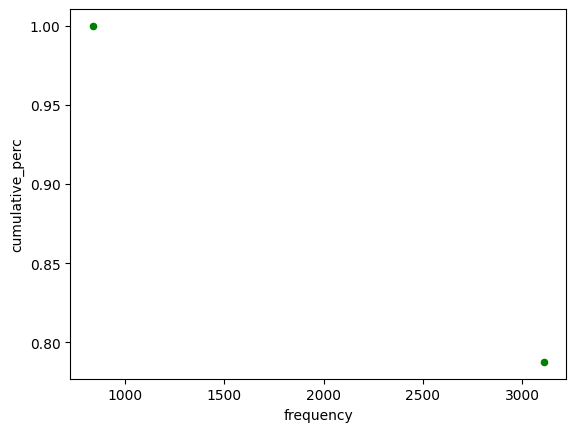

In [254]:
table1.plot("frequency", "cumulative_perc", kind="scatter", color='green')

<Axes: ylabel='frequency'>

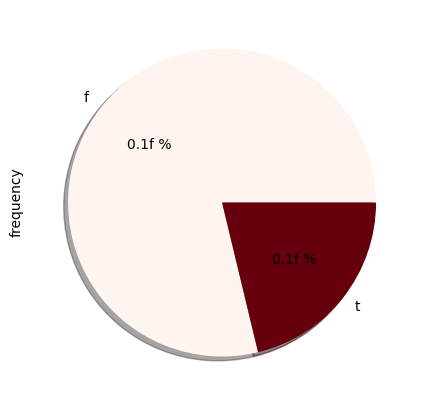

In [257]:
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="0.1f %%", colormap="Reds")

property_type

In [258]:
table1=freq_tbl(Micro_retailer['property_type'])
table2=table1.drop(['percentage','cumulative_perc'], axis=1)
filtro=table2[table2['frequency']>1]
filtro_index=filtro.set_index('property_type')

Text(0, 0.5, 'frecuhencia')

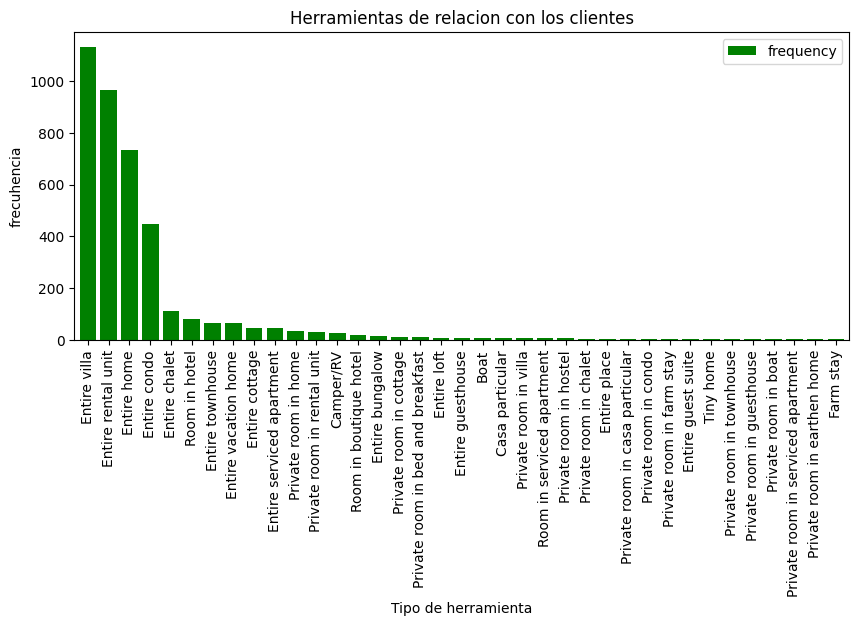

In [259]:
filtro_index.plot(kind='bar', width=0.8, figsize=(10,4), color='green')
plt.title('Herramientas de relacion con los clientes')
plt.xlabel('Tipo de herramienta')
plt.ylabel('frecuhencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

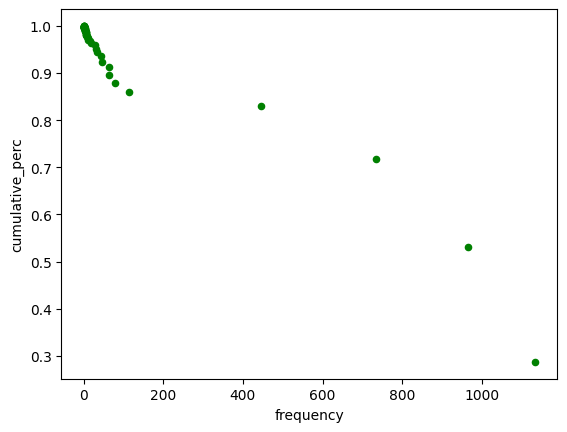

In [260]:
table1.plot("frequency", "cumulative_perc", kind="scatter", color='green')

<Axes: ylabel='frequency'>

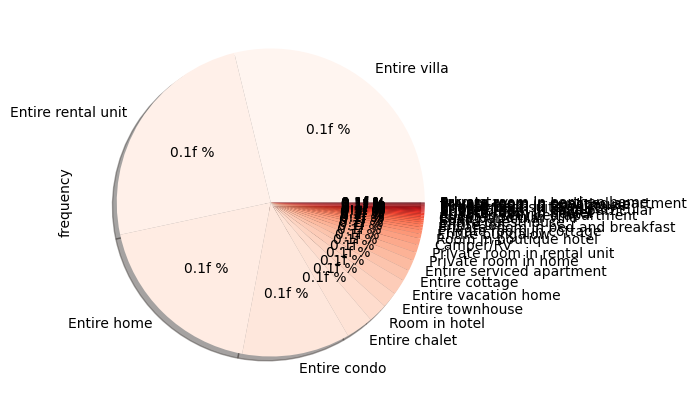

In [261]:
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="0.1f %%", colormap="Reds")

room_type

In [262]:
table1=freq_tbl(Micro_retailer['room_type'])
table2=table1.drop(['percentage','cumulative_perc'], axis=1)
filtro=table2[table2['frequency']>1]
filtro_index=filtro.set_index('room_type')

Text(0, 0.5, 'frecuhencia')

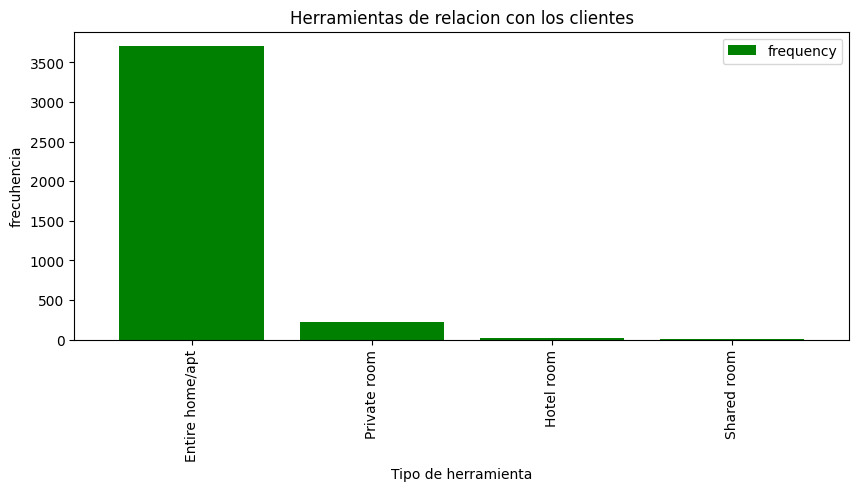

In [263]:
filtro_index.plot(kind='bar', width=0.8, figsize=(10,4), color='green')
plt.title('Herramientas de relacion con los clientes')
plt.xlabel('Tipo de herramienta')
plt.ylabel('frecuhencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

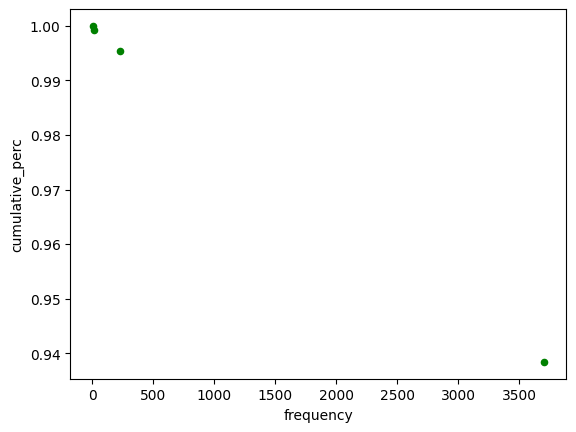

In [264]:
table1.plot("frequency", "cumulative_perc", kind="scatter", color='green')

<Axes: ylabel='frequency'>

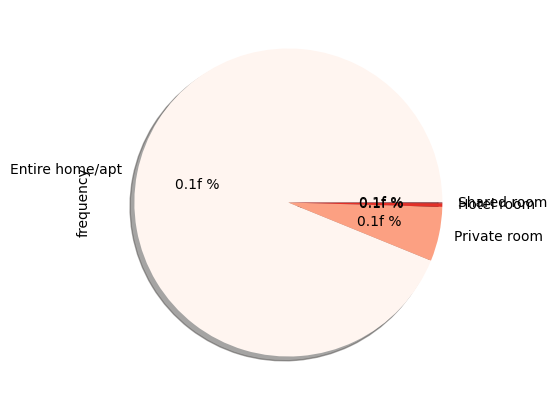

In [265]:
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="0.1f %%", colormap="Reds")

first_review

In [266]:
table1=freq_tbl(Micro_retailer['first_review'])
table2=table1.drop(['percentage','cumulative_perc'], axis=1)
filtro=table2[table2['frequency']>1]
filtro_index=filtro.set_index('first_review')

Text(0, 0.5, 'frecuhencia')

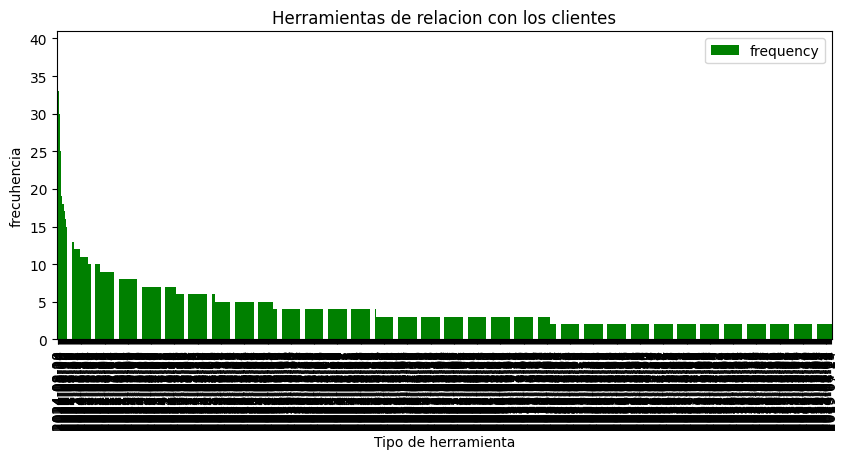

In [267]:
filtro_index.plot(kind='bar', width=0.8, figsize=(10,4), color='green')
plt.title('Herramientas de relacion con los clientes')
plt.xlabel('Tipo de herramienta')
plt.ylabel('frecuhencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

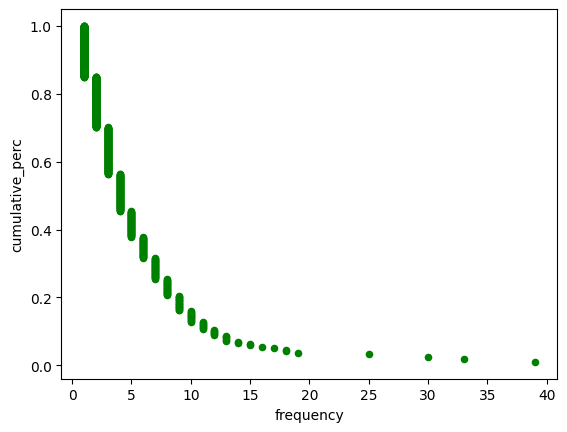

In [268]:
table1.plot("frequency", "cumulative_perc", kind="scatter", color='green')

<Axes: ylabel='frequency'>

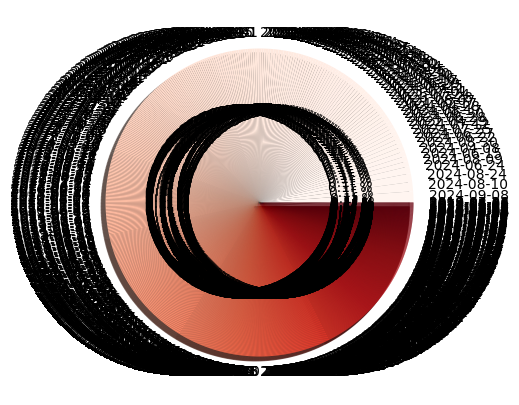

In [269]:
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="0.1f %%", colormap="Reds")

instant_bookable

In [270]:
table1=freq_tbl(Micro_retailer['instant_bookable'])
table2=table1.drop(['percentage','cumulative_perc'], axis=1)
filtro=table2[table2['frequency']>1]
filtro_index=filtro.set_index('instant_bookable')

Text(0, 0.5, 'frecuhencia')

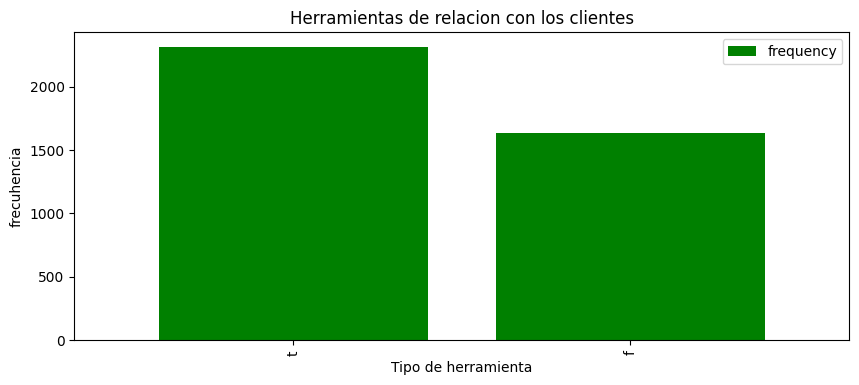

In [271]:
filtro_index.plot(kind='bar', width=0.8, figsize=(10,4), color='green')
plt.title('Herramientas de relacion con los clientes')
plt.xlabel('Tipo de herramienta')
plt.ylabel('frecuhencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

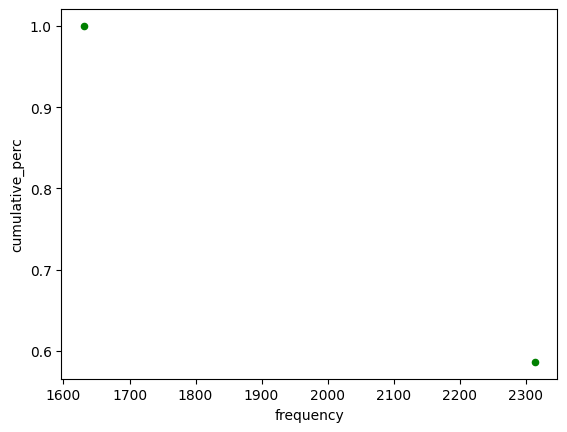

In [272]:
table1.plot("frequency", "cumulative_perc", kind="scatter", color='green')

<Axes: ylabel='frequency'>

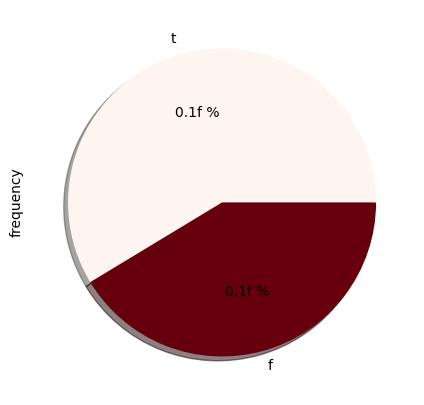

In [273]:
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="0.1f %%", colormap="Reds")

price

In [274]:
table1=freq_tbl(Micro_retailer['price'])
table2=table1.drop(['percentage','cumulative_perc'], axis=1)
filtro=table2[table2['frequency']>1]
filtro_index=filtro.set_index('price')

Text(0, 0.5, 'frecuhencia')

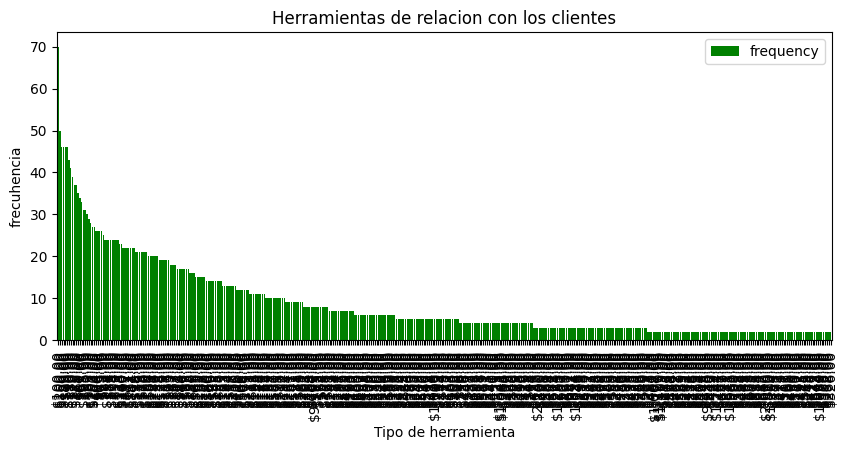

In [275]:
filtro_index.plot(kind='bar', width=0.8, figsize=(10,4), color='green')
plt.title('Herramientas de relacion con los clientes')
plt.xlabel('Tipo de herramienta')
plt.ylabel('frecuhencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

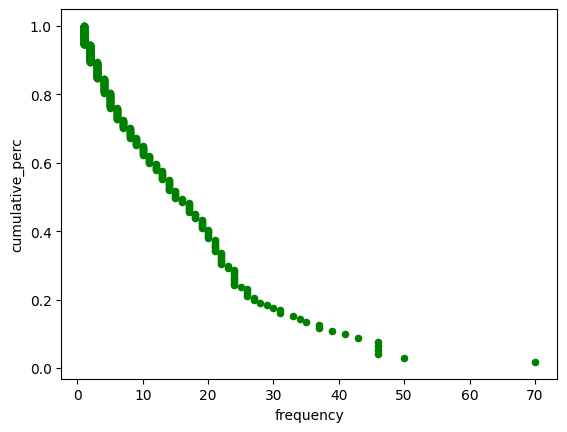

In [276]:
table1.plot("frequency", "cumulative_perc", kind="scatter", color='green')

<Axes: ylabel='frequency'>

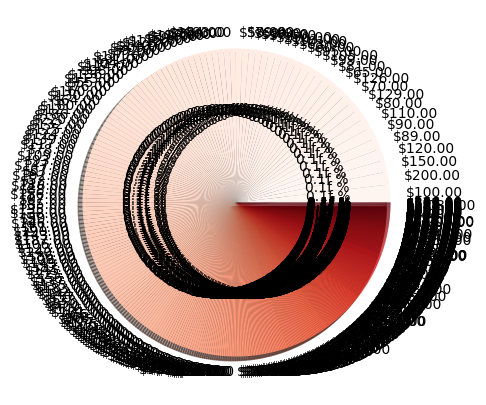

In [277]:
filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="0.1f %%", colormap="Reds")

determiacion de clases para datos agrupados


In [166]:
# Función para limpiar y convertir los valores con '%'
def convertir_porcentaje(valor):
    if isinstance(valor, str) and '%' in valor:  # Solo procesar strings con '%'
        return float(valor.replace('%', ''))  # Eliminar '%' y convertir a float
    return valor  # Dejar el resto igual

# Aplicar solo a columnas que contienen '%'
Micro_retailer = Micro_retailer.applymap(convertir_porcentaje)

C:\Users\ben31\AppData\Local\Temp\ipykernel_252\1003207983.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Micro_retailer = Micro_retailer.applymap(convertir_porcentaje)


host_response_rate

In [167]:
Micro_retailer['host_response_rate'].info()
n=3945

<class 'pandas.core.series.Series'>
RangeIndex: 3945 entries, 0 to 3944
Series name: host_response_rate
Non-Null Count  Dtype  
--------------  -----  
3945 non-null   float64
dtypes: float64(1)
memory usage: 30.9 KB


In [168]:
max=Micro_retailer['host_response_rate'].max()
min=Micro_retailer['host_response_rate'].min()
limites=[min,max]
limites

[0.0, 100.0]

In [169]:
r=max-min
r

100.0

In [170]:
ni=1+3.32*np.log10(n)
ni

12.938876065050856

In [171]:
i=r/ni
i

7.728646560740278

creacion de categorias a partir de clases 

In [172]:
intervalos=np.linspace(min, max, 13)
intervalos

array([  0.        ,   8.33333333,  16.66666667,  25.        ,
        33.33333333,  41.66666667,  50.        ,  58.33333333,
        66.66666667,  75.        ,  83.33333333,  91.66666667,
       100.        ])

In [173]:
categorias=["Extremadamente Insatisfecho", "Muy Insatisfecho", "Insatisfecho", 
            "Poco Insatisfecho", "Medianamente Insatisfecho", "Neutral", "Medianamente Satisfecho", 
            "Satisfecho", "Muy Satisfecho", "Bastante Satisfecho", "Muy Contento", "Totalmente Satisfecho"]


In [174]:
Micro_retailer['host_response_rate']=pd.cut(x=Micro_retailer['host_response_rate'],bins=intervalos, labels=categorias)
Micro_retailer['host_response_rate']

0       Totalmente Satisfecho
1       Totalmente Satisfecho
2                Insatisfecho
3                Insatisfecho
4       Totalmente Satisfecho
                ...          
3940             Muy Contento
3941             Muy Contento
3942             Muy Contento
3943             Muy Contento
3944    Totalmente Satisfecho
Name: host_response_rate, Length: 3945, dtype: category
Categories (12, object): ['Extremadamente Insatisfecho' < 'Muy Insatisfecho' < 'Insatisfecho' < 'Poco Insatisfecho' ... 'Muy Satisfecho' < 'Bastante Satisfecho' < 'Muy Contento' < 'Totalmente Satisfecho']

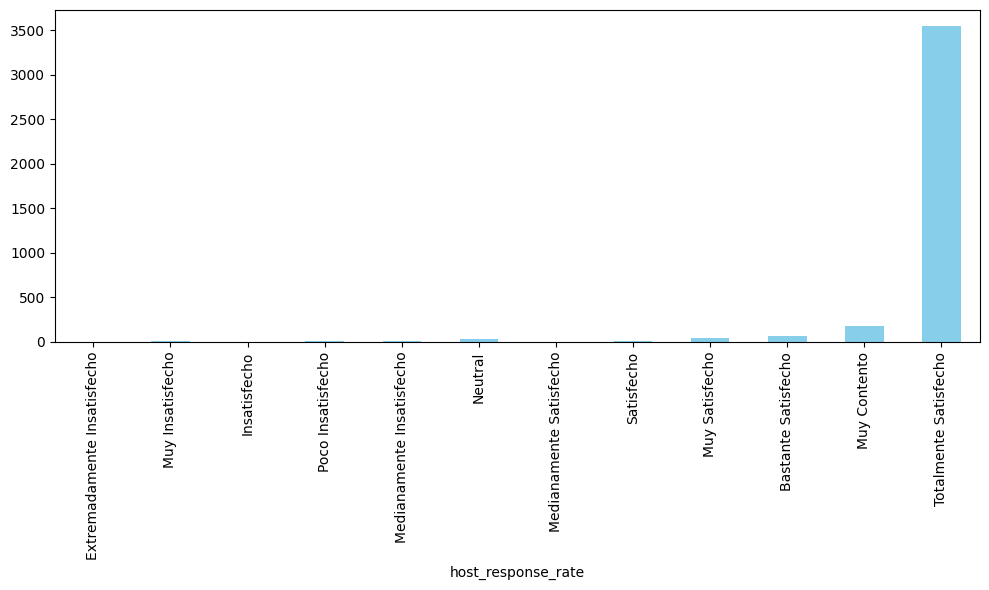

In [ ]:
# Contar las frecuencias de cada categoría en la columna 'accommodates'
frecuencias = Micro_retailer['host_response_rate'].value_counts().sort_index()

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
frecuencias.plot(kind='bar', color='skyblue')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

host _acceptance _rate

In [175]:
Micro_retailer['host_acceptance_rate'].info()
n=3945

<class 'pandas.core.series.Series'>
RangeIndex: 3945 entries, 0 to 3944
Series name: host_acceptance_rate
Non-Null Count  Dtype  
--------------  -----  
3945 non-null   float64
dtypes: float64(1)
memory usage: 30.9 KB


In [176]:
max=Micro_retailer['host_acceptance_rate'].max()
min=Micro_retailer['host_acceptance_rate'].min()
limites=[min,max]
limites

[0.0, 100.0]

In [177]:
r=max-min
r

100.0

In [178]:
ni=1+3.32*np.log10(n)
ni

12.938876065050856

In [179]:
i=r/ni
i

7.728646560740278

In [180]:
intervalos=np.linspace(min, max, 13)
intervalos

array([  0.        ,   8.33333333,  16.66666667,  25.        ,
        33.33333333,  41.66666667,  50.        ,  58.33333333,
        66.66666667,  75.        ,  83.33333333,  91.66666667,
       100.        ])

In [181]:
categorias=[
    "Muy Baja", "Baja", "Baja Media", "Media Baja", 
    "Neutral Baja", "Neutral", "Neutral Alta", "Media Alta", 
    "Alta Media", "Alta", "Muy Alta", "Excelente"
]

In [183]:
Micro_retailer['host_acceptance_rate']=pd.cut(x=Micro_retailer['host_acceptance_rate'],bins=intervalos, labels=categorias)
Micro_retailer['host_acceptance_rate']

0       Excelente
1       Excelente
2             NaN
3             NaN
4            Alta
          ...    
3940    Excelente
3941    Excelente
3942    Excelente
3943    Excelente
3944    Excelente
Name: host_acceptance_rate, Length: 3945, dtype: category
Categories (12, object): ['Muy Baja' < 'Baja' < 'Baja Media' < 'Media Baja' ... 'Alta Media' < 'Alta' < 'Muy Alta' < 'Excelente']

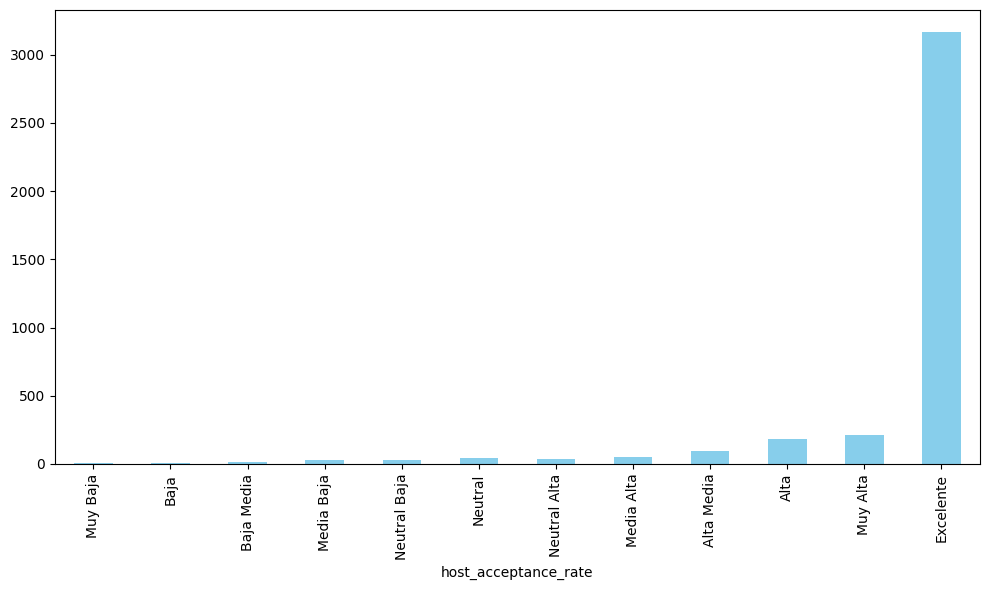

In [236]:
frecuencias = Micro_retailer['host_acceptance_rate'].value_counts().sort_index()

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
frecuencias.plot(kind='bar', color='skyblue')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

host_total_listings_count

In [184]:
Micro_retailer['host_total_listings_count'].info()
n=3945

<class 'pandas.core.series.Series'>
RangeIndex: 3945 entries, 0 to 3944
Series name: host_total_listings_count
Non-Null Count  Dtype  
--------------  -----  
3945 non-null   float64
dtypes: float64(1)
memory usage: 30.9 KB


In [ ]:
max=Micro_retailer['host_total_listings_count'].max()
min=Micro_retailer['host_total_listings_count'].min()
limites=[min,max]
limites

[1.0, 181.0]

In [187]:
r=max-min
r

180.0

In [188]:
ni=1+3.32*np.log10(n)
ni

12.938876065050856

In [189]:
i=r/ni
i

13.9115638093325

In [190]:
intervalos=np.linspace(min, max, 13)
intervalos

array([  1.,  16.,  31.,  46.,  61.,  76.,  91., 106., 121., 136., 151.,
       166., 181.])

In [191]:
categorias=[
    "Muy Baja", "Baja", "Baja Media", "Media Baja", 
    "Neutral Baja", "Neutral", "Neutral Alta", "Media Alta", 
    "Alta Media", "Alta", "Muy Alta", "Excelente"
]

In [192]:
Micro_retailer['host_total_listings_count']=pd.cut(x=Micro_retailer['host_total_listings_count'],bins=intervalos, labels=categorias)
Micro_retailer['host_total_listings_count']

0       Muy Baja
1       Muy Baja
2       Muy Baja
3       Muy Baja
4            NaN
          ...   
3940        Baja
3941        Baja
3942        Baja
3943        Baja
3944        Baja
Name: host_total_listings_count, Length: 3945, dtype: category
Categories (12, object): ['Muy Baja' < 'Baja' < 'Baja Media' < 'Media Baja' ... 'Alta Media' < 'Alta' < 'Muy Alta' < 'Excelente']

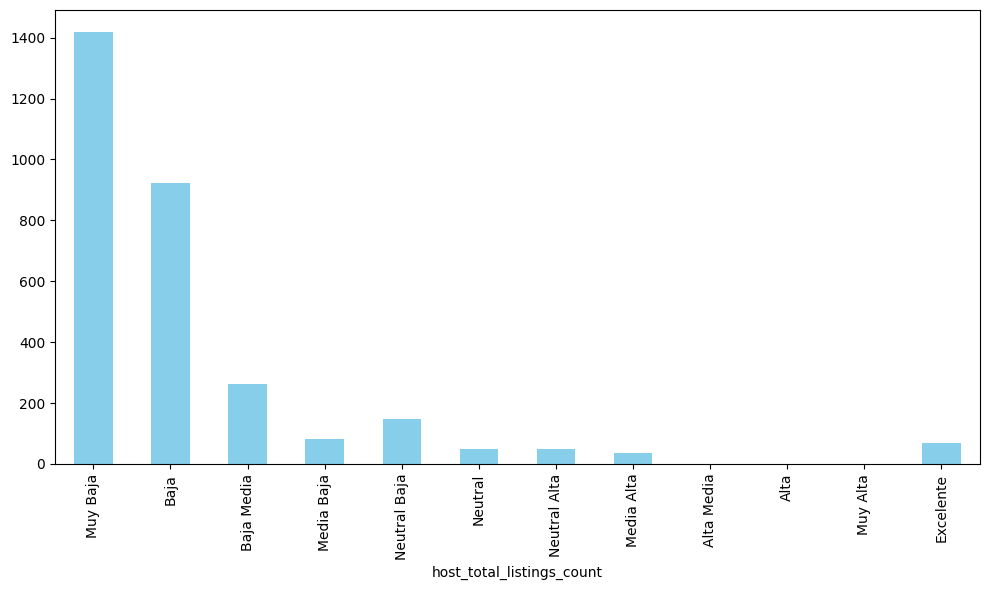

In [235]:

frecuencias = Micro_retailer['host_total_listings_count'].value_counts().sort_index()

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
frecuencias.plot(kind='bar', color='skyblue')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

bathrooms_text

In [193]:
Micro_retailer['bathrooms_text'].info()
n=3945

<class 'pandas.core.series.Series'>
RangeIndex: 3945 entries, 0 to 3944
Series name: bathrooms_text
Non-Null Count  Dtype 
--------------  ----- 
3945 non-null   object
dtypes: object(1)
memory usage: 30.9+ KB


In [205]:
# Función para convertir las descripciones de los baños a números
def extraer_baños(texto):
    try:
        # Extraer solo el número antes de la palabra "bath" o "baths"
        num = float(''.join(filter(str.isdigit, texto.split()[0]))) 
        return num
    except:
        # Para los casos que no se pueden convertir, asignar un valor NaN o 0
        return np.nan

# Aplicar la función para extraer los números de baños
Micro_retailer['bathrooms_text'] = Micro_retailer['bathrooms_text'].apply(extraer_baños)



In [206]:
max=Micro_retailer['bathrooms_text'].max()
min=Micro_retailer['bathrooms_text'].min()
limites=[min,max]
limites

[0.0, 75.0]

In [207]:
r=max-min
r

75.0

In [208]:
ni=1+3.32*np.log10(n)
ni

12.938876065050856

In [209]:
i=r/ni
i

5.7964849205552085

In [210]:
intervalos=np.linspace(min, max, 13)
intervalos

array([ 0.  ,  6.25, 12.5 , 18.75, 25.  , 31.25, 37.5 , 43.75, 50.  ,
       56.25, 62.5 , 68.75, 75.  ])

In [211]:
categorias=[
    "Muy Baja", "Baja", "Baja Media", "Media Baja", 
    "Neutral Baja", "Neutral", "Neutral Alta", "Media Alta", 
    "Alta Media", "Alta", "Muy Alta", "sobresaliante"
]

In [212]:
Micro_retailer['bathrooms_text']=pd.cut(x=Micro_retailer['bathrooms_text'],bins=intervalos, labels=categorias)
Micro_retailer['bathrooms_text']

0       Muy Baja
1       Muy Baja
2       Muy Baja
3           Baja
4       Muy Baja
          ...   
3940    Muy Baja
3941    Muy Baja
3942    Muy Baja
3943    Muy Baja
3944    Muy Baja
Name: bathrooms_text, Length: 3945, dtype: category
Categories (12, object): ['Muy Baja' < 'Baja' < 'Baja Media' < 'Media Baja' ... 'Alta Media' < 'Alta' < 'Muy Alta' < 'sobresaliante']

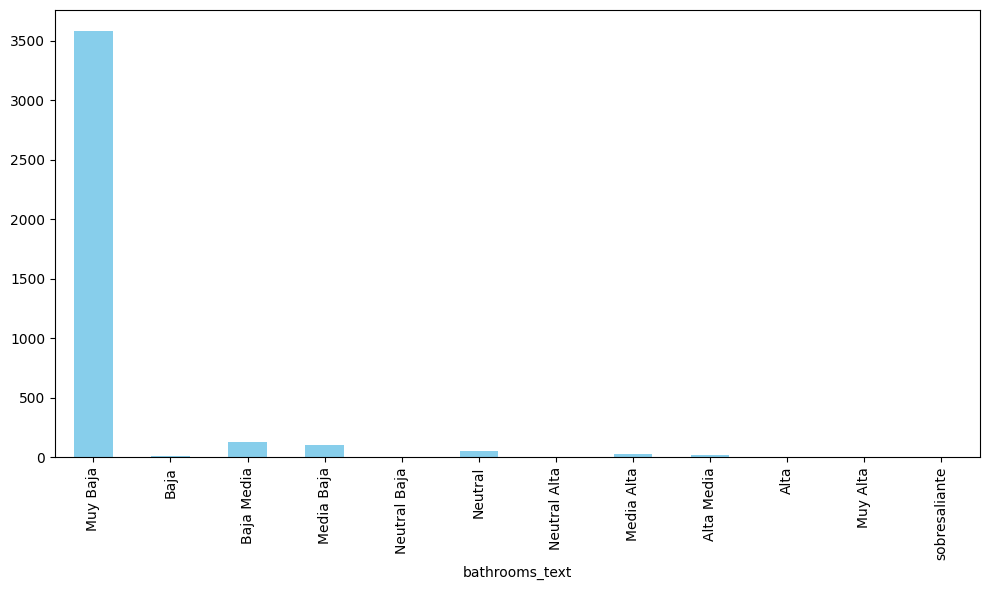

In [237]:
frecuencias = Micro_retailer['bathrooms_text'].value_counts().sort_index()

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
frecuencias.plot(kind='bar', color='skyblue')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

maximum_nights_avg_ntm

In [213]:
Micro_retailer['maximum_nights_avg_ntm'].info()
n=3945

<class 'pandas.core.series.Series'>
RangeIndex: 3945 entries, 0 to 3944
Series name: maximum_nights_avg_ntm
Non-Null Count  Dtype  
--------------  -----  
3945 non-null   float64
dtypes: float64(1)
memory usage: 30.9 KB


In [214]:
max=Micro_retailer['maximum_nights_avg_ntm'].max()
min=Micro_retailer['maximum_nights_avg_ntm'].min()
limites=[min,max]
limites

[2.0, 1125.0]

In [215]:
r=max-min
r

1123.0

In [216]:
ni=1+3.32*np.log10(n)
ni

12.938876065050856

In [217]:
i=r/ni
i

86.79270087711332

In [218]:
intervalos=np.linspace(min, max, 13)
intervalos

array([   2.        ,   95.58333333,  189.16666667,  282.75      ,
        376.33333333,  469.91666667,  563.5       ,  657.08333333,
        750.66666667,  844.25      ,  937.83333333, 1031.41666667,
       1125.        ])

In [219]:
categorias=[
    "Muy Baja", "Baja", "Baja Media", "Media Baja", 
    "Neutral Baja", "Neutral", "Neutral Alta", "Media Alta", 
    "Alta Media", "Alta", "Muy Alta", "sobresaliante"
]

In [220]:
Micro_retailer['maximum_nights_avg_ntm']=pd.cut(x=Micro_retailer['maximum_nights_avg_ntm'],bins=intervalos, labels=categorias)
Micro_retailer['maximum_nights_avg_ntm']

0       sobresaliante
1            Muy Baja
2            Muy Baja
3            Muy Baja
4       sobresaliante
            ...      
3940    sobresaliante
3941    sobresaliante
3942       Baja Media
3943    sobresaliante
3944       Baja Media
Name: maximum_nights_avg_ntm, Length: 3945, dtype: category
Categories (12, object): ['Muy Baja' < 'Baja' < 'Baja Media' < 'Media Baja' ... 'Alta Media' < 'Alta' < 'Muy Alta' < 'sobresaliante']

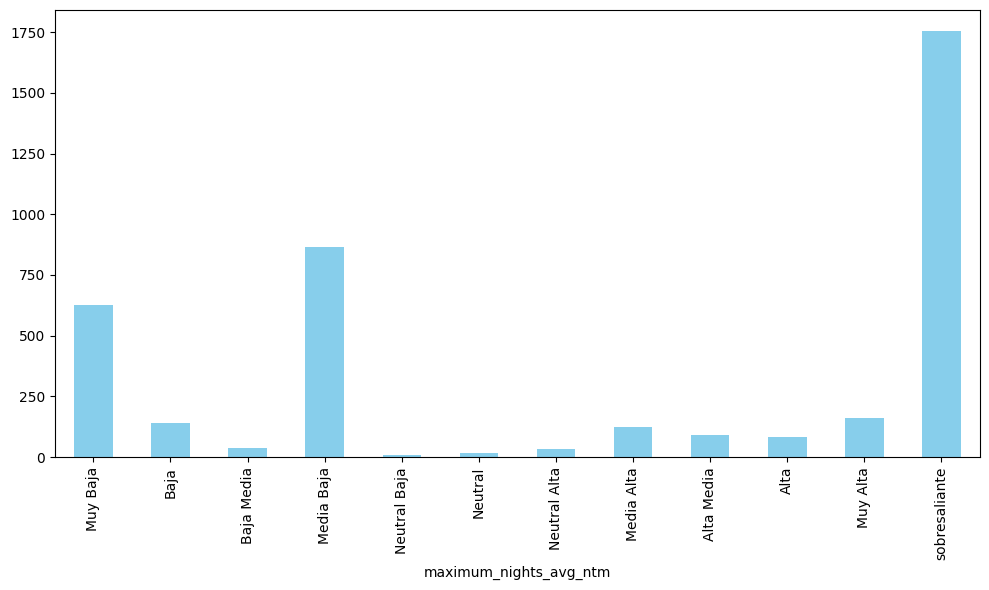

In [278]:
frecuencias = Micro_retailer['maximum_nights_avg_ntm'].value_counts().sort_index()

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
frecuencias.plot(kind='bar', color='skyblue')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

accommodates

In [223]:
Micro_retailer['accommodates'].info()
n=3945

<class 'pandas.core.series.Series'>
RangeIndex: 3945 entries, 0 to 3944
Series name: accommodates
Non-Null Count  Dtype  
--------------  -----  
3945 non-null   float64
dtypes: float64(1)
memory usage: 30.9 KB


In [224]:
max=Micro_retailer['accommodates'].max()
min=Micro_retailer['accommodates'].min()
limites=[min,max]
limites

[1.0, 9.0]

In [225]:
r=max-min
r

8.0

In [226]:
ni=1+3.32*np.log10(n)
ni

12.938876065050856

In [227]:
i=r/ni
i

0.6182917248592222

In [228]:
intervalos=np.linspace(min, max, 13)
intervalos

array([1.        , 1.66666667, 2.33333333, 3.        , 3.66666667,
       4.33333333, 5.        , 5.66666667, 6.33333333, 7.        ,
       7.66666667, 8.33333333, 9.        ])

In [229]:
categorias=[
    "Muy Baja", "Baja", "Baja Media", "Media Baja", 
    "Neutral Baja", "Neutral", "Neutral Alta", "Media Alta", 
    "Alta Media", "Alta", "Muy Alta", "sobresaliante"
]

In [230]:
Micro_retailer['accommodates']=pd.cut(x=Micro_retailer['accommodates'],bins=intervalos, labels=categorias)
Micro_retailer['accommodates']

0         Media Alta
1       Neutral Baja
2       Neutral Alta
3       Neutral Alta
4       Neutral Baja
            ...     
3940        Muy Alta
3941      Media Alta
3942        Muy Alta
3943      Media Alta
3944        Muy Alta
Name: accommodates, Length: 3945, dtype: category
Categories (12, object): ['Muy Baja' < 'Baja' < 'Baja Media' < 'Media Baja' ... 'Alta Media' < 'Alta' < 'Muy Alta' < 'sobresaliante']

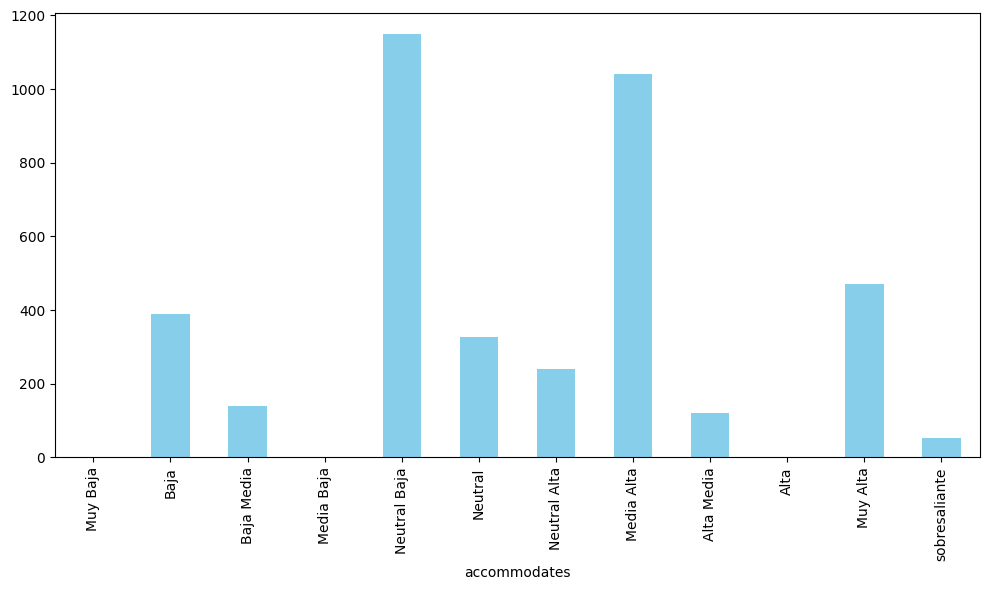

In [280]:
frecuencias = Micro_retailer['accommodates'].value_counts().sort_index()

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
frecuencias.plot(kind='bar', color='skyblue')


# Mostrar el gráfico
plt.tight_layout()
plt.show()


beds

In [279]:
Micro_retailer['beds'].info()
n=3945

max=Micro_retailer['beds'].max()
min=Micro_retailer['beds'].min()
limites=[min,max]

r=max-min
r

ni=1+3.32*np.log10(n)
ni

i=r/ni
i

intervalos=np.linspace(min, max, 13)
intervalos

categorias=[
    "Muy Baja", "Baja", "Baja Media", "Media Baja", 
    "Neutral Baja", "Neutral", "Neutral Alta", "Media Alta", 
    "Alta Media", "Alta", "Muy Alta", "sobresaliante"
]

Micro_retailer['beds']=pd.cut(x=Micro_retailer['beds'],bins=intervalos, labels=categorias)
Micro_retailer['beds']

<class 'pandas.core.series.Series'>
RangeIndex: 3945 entries, 0 to 3944
Series name: beds
Non-Null Count  Dtype  
--------------  -----  
3945 non-null   float64
dtypes: float64(1)
memory usage: 30.9 KB


0          Media Alta
1             Neutral
2             Neutral
3             Neutral
4        Neutral Baja
            ...      
3940         Muy Alta
3941       Media Alta
3942       Alta Media
3943       Media Alta
3944    sobresaliante
Name: beds, Length: 3945, dtype: category
Categories (12, object): ['Muy Baja' < 'Baja' < 'Baja Media' < 'Media Baja' ... 'Alta Media' < 'Alta' < 'Muy Alta' < 'sobresaliante']

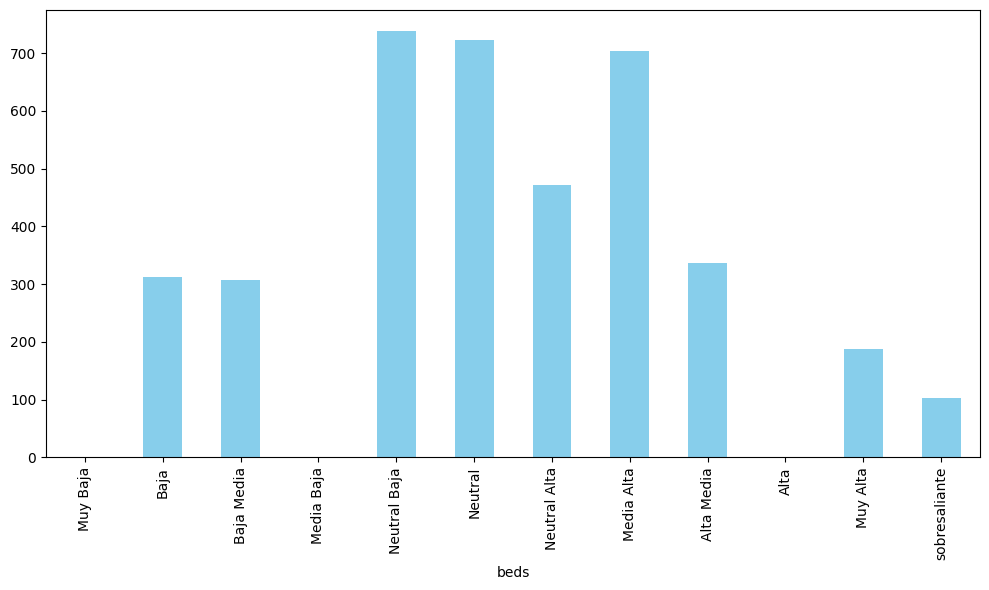

In [281]:
frecuencias = Micro_retailer['beds'].value_counts().sort_index()

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
frecuencias.plot(kind='bar', color='skyblue')


# Mostrar el gráfico
plt.tight_layout()
plt.show()
